In [1]:
import sys
sys.path.append('../../../../src/scVI/')
import scvi
from scvi.inference import UnsupervisedTrainer, AlternateSemiSupervisedTrainer
from scvi.models import VAE, SCANVI
from scvi.dataset.anndataset import AnnDatasetFromAnnData

scvi.__version__ 

[2020-01-19 15:56:33,217] INFO - scvi._settings | Added StreamHandler with custom formatter to 'scvi' logger.
/home/angela/anaconda3/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


'0.5.0'

In [2]:
import sys
sys.path.append('../10_utils/')
import colorDict

age_color_dict = colorDict.age_color_dict()
tissue_color_dict = colorDict.tissue_color_dict()

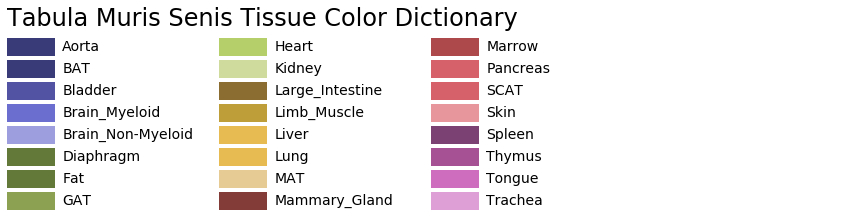

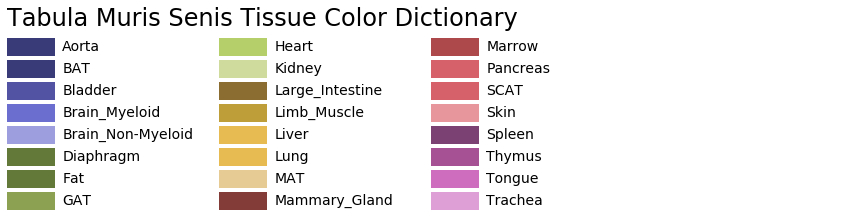

In [5]:
colorDict.plot_colortable(tissue_color_dict, "Tabula Muris Senis Tissue Color Dictionary", sort_colors=False, emptycols=1)

In [3]:
tissue_color_dict

{'Aorta': '#393b79',
 'BAT': '#393b79',
 'Bladder': '#5254a3',
 'Brain_Myeloid': '#6b6ecf',
 'Brain_Non-Myeloid': '#9c9ede',
 'Diaphragm': '#637939',
 'Fat': '#637939',
 'GAT': '#8ca252',
 'Heart': '#b5cf6b',
 'Kidney': '#cedb9c',
 'Large_Intestine': '#8c6d31',
 'Limb_Muscle': '#bd9e39',
 'Liver': '#e7ba52',
 'Lung': '#e7ba52',
 'MAT': '#e7cb94',
 'Mammary_Gland': '#843c39',
 'Marrow': '#ad494a',
 'Pancreas': '#d6616b',
 'SCAT': '#d6616b',
 'Skin': '#e7969c',
 'Spleen': '#7b4173',
 'Thymus': '#a55194',
 'Tongue': '#ce6dbd',
 'Trachea': '#de9ed6'}

In [2]:
import torch
import numpy as np

torch.manual_seed(0)
np.random.seed(0)

import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import csv
from igraph import *
from MulticoreTSNE import MulticoreTSNE as TSNE #faster TSNE alternative
from anndata import read_h5ad
from anndata import read_csv

sc.settings.verbosity = 3
sc.logging.print_versions()
np.random.seed(685)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.set_figure_params(dpi=50)

scanpy==1.4.2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 


In [5]:
# vae = VAE(
#         scviDataset.nb_genes,
#         n_batch=scviDataset.n_batches * use_batches,
#         n_hidden=128, n_latent=30, n_layers=5, dispersion='gene'
#     )
trainer = UnsupervisedTrainer(vae, scviDataset, train_size=.99, use_cuda=use_cuda)
trainer.model.load_state_dict(torch.load('tms-scVI-trainer-model'))

NameError: name 'vae' is not defined

In [6]:
torch.load('tms-scVI-trainer-model')

OrderedDict([('px_r',
              tensor([-0.1945, -0.7204, -0.6762, -0.1669, -0.4410, -0.3026, -0.4692, -0.6788,
                      -0.4277, -0.4984, -0.7983,  0.8448, -0.9097, -0.5858, -0.8004, -0.4210,
                      -0.8848, -0.6283, -1.5221, -1.5084, -1.1498, -1.2836, -0.6901, -1.3948,
                      -0.2419, -0.5196, -0.4465, -1.0373, -0.6712, -0.8320, -0.9847, -0.4862,
                      -0.5084, -1.0813, -2.4566, -0.2124, -1.1964, -0.2824, -0.7676, -1.6896,
                      -1.4102, -0.7747, -0.8401,  0.1792, -0.5461, -0.8132, -2.4635, -0.5651,
                       0.5623, -1.0120, -1.2004, -0.5442, -0.0045, -0.3270, -0.4138, -0.5082,
                      -1.0142, -0.6695, -0.5423, -1.2431, -0.8088, -0.1806, -0.5400, -0.6338,
                      -0.7364, -0.8040, -2.2018, -1.1591, -1.2557, -1.0199, -0.4497, -1.0375,
                       0.2102, -2.0860, -1.7488, -1.0534, -0.9435, -0.8197, -0.5230, -0.9657,
                      -0.2652, -0.2349

In [21]:
adata = read_h5ad('../../0_data_ingest/01_figure_1/tabula-muris-senis-droplet-processed-official-annotations-Liver.h5ad')
adata

AnnData object with n_obs × n_vars = 7294 × 20138 
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'age_colors', 'cell_ontology_class_colors', 'leiden', 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

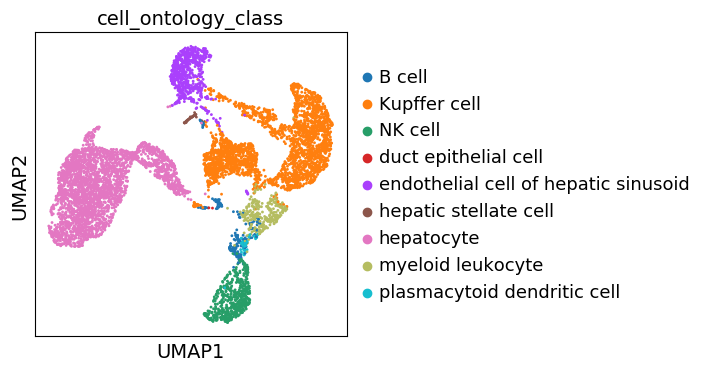

In [22]:
sc.pl.umap(adata,color=['cell_ontology_class'])

In [27]:
adata[adata.obs['cell_ontology_class']=='duct epithelial cell']

View of AnnData object with n_obs × n_vars = 2 × 20138 
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'age_colors', 'cell_ontology_class_colors', 'leiden', 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

Liver


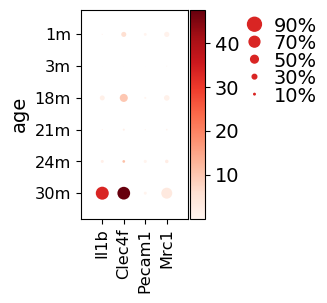

endothelial cell of hepatic sinusoid


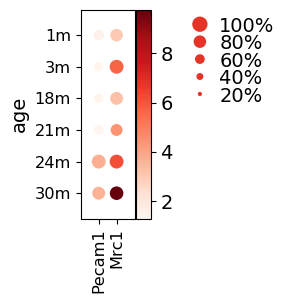

Kupffer cell


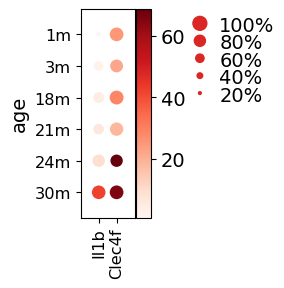

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.7, 0, 0.2, 0.5, 0.25])

In [33]:
print('Liver')
sc.pl.dotplot(adata,['Il1b','Clec4f','Pecam1','Mrc1'],groupby='age')
print('endothelial cell of hepatic sinusoid')
sc.pl.dotplot(adata[adata.obs['cell_ontology_class']=='endothelial cell of hepatic sinusoid'],['Pecam1','Mrc1'],groupby='age')
print('Kupffer cell')
sc.pl.dotplot(adata[adata.obs['cell_ontology_class']=='Kupffer cell'],['Il1b','Clec4f'],groupby='age')

# for c in ['endothelial cell of hepatic sinusoid','Kupffer cell']:#list(set(adata.obs['cell_ontology_class'])):
#     print(c)
#     sc.pl.dotplot(adata[adata.obs['cell_ontology_class']==c],['Mrc1','Clec4f','Pecam1','Mrc1'],groupby='age')

In [ ]:
# adata = read_h5ad('../../0_data_ingest/01_figure_1/tabula-muris-senis-scVI-official-annotations-umap.h5ad')
adata = read_h5ad('../../../tabula-muris-senis-scVI-official-annotations.h5ad')
adata

In [ ]:
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca_overview(adata)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40, use_rep="X_scvi")
sc.tl.umap(adata)

In [ ]:
sc.tl.louvain(adata, key_added="louvain_scvi", resolution=0.7)

In [ ]:
sc.pl.umap(adata, color=['age'], ncols=1, save = '_tms_age.pdf')
sc.pl.umap(adata, color=['tissue'], ncols=1, save = '_tms_tissue.pdf')
sc.pl.umap(adata, color=['method'], ncols=1, save = '_tms_method.pdf')

In [ ]:
subset_de

In [ ]:
# # Call scvi function
# per_cluster_de, cluster_id = scvi_posterior.one_vs_all_degenes(
#     cell_labels=np.asarray(adata.obs['agenum'].values).astype(int).ravel(),
#     min_cells=1,
#     n_samples=None,
#     M_permutation=None,
# )

# # convert to ScanPy format -- this is just about feeding scvi results into a format readable by ScanPy
# markers = []
# scores = []
# names = []
# for i, x in enumerate(per_cluster_de):
#     subset_de = x[:n_genes]
#     markers.append(subset_de)
#     scores.append(tuple(subset_de["bayes1"].values))
#     names.append(tuple(subset_de.index.values))

# markers = pd.concat(markers)
# dtypes_scores = [(str(i), "<f4") for i in range(len(scores))]
# dtypes_names = [(str(i), "<U50") for i in range(len(names))]
# scores = np.array([tuple(row) for row in np.array(scores).T], dtype=dtypes_scores)
# scores = scores.view(np.recarray)
# names = np.array([tuple(row) for row in np.array(names).T], dtype=dtypes_names)
# names = names.view(np.recarray)

adata.uns["rank_genes_groups_scvi"] = {
    "params": {
        "groupby": "",
        "reference": "rest",
        "method": "",
        "use_raw": True,
        "corr_method": "",
    },
    "scores": scores,
    "names": names,
}
#     return markers

In [ ]:
def rank_genes_groups_bayes(
    adata: sc.AnnData,
    scvi_posterior: scvi.inference.Posterior,
    use_observed_batches: bool = True,
    n_samples: int = None,
    M_permutation: int = None,
    n_genes: int = 25,
    label_name: str = "louvain_scvi",
) -> pd.DataFrame:
    """
    Rank genes for characterizing groups. 
    Computes Bayes factor for each cluster against the others to test for differential expression.
    See Nature article (https://rdcu.be/bdHYQ)

    :param adata: sc.AnnData object non-normalized
    :param scvi_posterior: 
    :param n_samples: 
    :param M_permutation: 
    :param n_genes: 
    :param label_name: The groups tested are taken from adata.obs[label_name] which can be computed 
                       using clustering like Louvain (Ex: sc.tl.louvain(adata, key_added=label_name) )
    :return: Summary of Bayes factor per gene, per cluster
    """

    # Call scvi function
    per_cluster_de, cluster_id = scvi_posterior.one_vs_all_degenes(
        cell_labels=np.asarray(adata.obs[label_name].values).astype(int).ravel(),
        min_cells=1,
        n_samples=n_samples,
        M_permutation=M_permutation
    )

    # convert to ScanPy format -- this is just about feeding scvi results into a format readable by ScanPy
    markers = []
    scores = []
    names = []
    for i, x in enumerate(per_cluster_de):
        subset_de = x[:n_genes]
        markers.append(subset_de)
        scores.append(tuple(subset_de["bayes1"].values))
        names.append(tuple(subset_de.index.values))

    markers = pd.concat(markers)
    dtypes_scores = [(str(i), "<f4") for i in range(len(scores))]
    dtypes_names = [(str(i), "<U50") for i in range(len(names))]
    scores = np.array([tuple(row) for row in np.array(scores).T], dtype=dtypes_scores)
    scores = scores.view(np.recarray)
    names = np.array([tuple(row) for row in np.array(names).T], dtype=dtypes_names)
    names = names.view(np.recarray)

    adata.uns["rank_genes_groups_scvi"] = {
        "params": {
            "groupby": "",
            "reference": "rest",
            "method": "",
            "use_raw": True,
            "corr_method": "",
        },
        "scores": scores,
        "names": names,
    }
    return markers

In [ ]:
adata

In [ ]:
set(adata.obs['agenum'])

In [ ]:
n_genes = 10
rank_genes_groups_bayes(
    adata, scvi_posterior, label_name="louvain_scvi", n_genes=n_genes
)

In [ ]:
sc.pl.rank_genes_groups(
    adata, key="rank_genes_groups_scvi", sharey=False, n_genes=n_genes)

In [ ]:
sc.tl.rank_genes_groups(
    adata,
    "louvain_scvi",
    method="wilcoxon",
    use_raw=False,
    key_added="rank_genes_groups_wilcox",
    n_genes=n_genes,
)

sc.pl.rank_genes_groups(
    adata, key="rank_genes_groups_wilcox", sharey=False, n_genes=n_genes)

In [ ]:
adata.uns["rank_genes_groups_scvi"]